## Addestramento e Valutazione dei Modelli

In questa fase procederemo con il training, la valutazione e il salvataggio di tre diverse architetture neurali per classificare i 4 stadi della demenza:

1. **MobileNetV2**: Una rete convoluzionale leggera ed efficiente (ideale per risorse limitate).
2. **MLP (Baseline)**: Una classica rete densa, usata per dimostrare come i modelli tradizionali fatichino a comprendere le relazioni spaziali nelle immagini rispetto alle CNN.
3. **ResNet-18**: Una rete convoluzionale più profonda per massimizzare l'accuratezza.

Per garantire un benchmark equo, tutti i modelli saranno addestrati con gli stessi iperparametri (5 epoche, Learning Rate a 0.001). I pesi migliori verranno salvati automaticamente nella cartella `results/multiclass/`.

In [2]:
import sys
import os

# Aggiungiamo la root directory del progetto al path in modo che il notebook veda la cartella 'src'
if '.' not in sys.path:
    sys.path.append('.')
if '..' not in sys.path:
    sys.path.append('..')

# Importiamo le architetture che hai salvato nel file src/models/architectures.py
from src.models.architectures import MLPBaseline, get_mobilenet, get_resnet18

print("⏳ Caricamento delle architetture in corso...")

# 1. La nostra baseline (Multi-Layer Perceptron) configurata per 4 classi
mlp_model = MLPBaseline(num_classes=4)

# 2. Il modello leggero (MobileNetV2) con Transfer Learning per 4 classi
mobilenet_model = get_mobilenet(num_classes=4)

# 3. Il modello profondo (ResNet-18) con Transfer Learning per 4 classi
resnet_model = get_resnet18(num_classes=4)

print("✅ Modelli importati e istanziati con successo! Pronti per l'addestramento.")

Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


100%|██████████| 13.6M/13.6M [00:00<00:00, 100MB/s] 


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 128MB/s]


✅ Architetture (MLP, MobileNet, ResNet) caricate e configurate per 4 classi!
⏳ Caricamento delle architetture in corso...
✅ Modelli importati e istanziati con successo! Pronti per l'addestramento.


📦 Creazione dei generatori di dati (DataLoaders)...
✅ Dataloaders creati con successo!
 - Batch per Addestramento: 1062
 - Batch per Validazione: 100
 - Batch per Test: 100

🚀 Avvio addestramento di MobileNetV2...
Epoch 1/5
----------
Train Loss: 0.6558 Acc: 0.7070
Val Loss: 0.6598 Acc: 0.6816

Epoch 2/5
----------
Train Loss: 0.4203 Acc: 0.8246
Val Loss: 0.4786 Acc: 0.7981

Epoch 3/5
----------
Train Loss: 0.3005 Acc: 0.8783
Val Loss: 0.3962 Acc: 0.8353

Epoch 4/5
----------
Train Loss: 0.2265 Acc: 0.9125
Val Loss: 0.2121 Acc: 0.9163

Epoch 5/5
----------
Train Loss: 0.1953 Acc: 0.9274
Val Loss: 0.1134 Acc: 0.9597

Migliore Accuratezza in Validazione: 0.959688

📊 Valutazione del modello sul Test Set...

--- Report di Classificazione sul Test Set ---
                  precision    recall  f1-score   support

     NonDemented       0.98      0.95      0.97      1605
VeryMildDemented       0.94      0.95      0.95      1120
    MildDemented       0.93      1.00      0.96       450
Modera

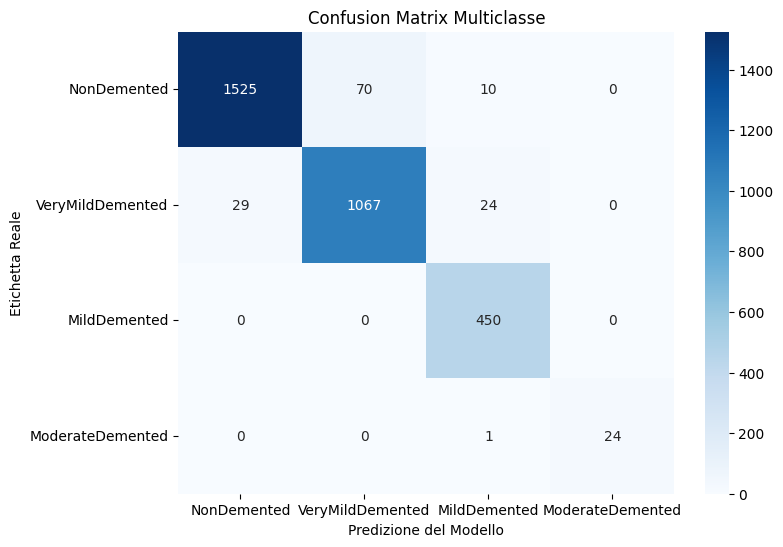


📈 Generazione della Curva ROC...


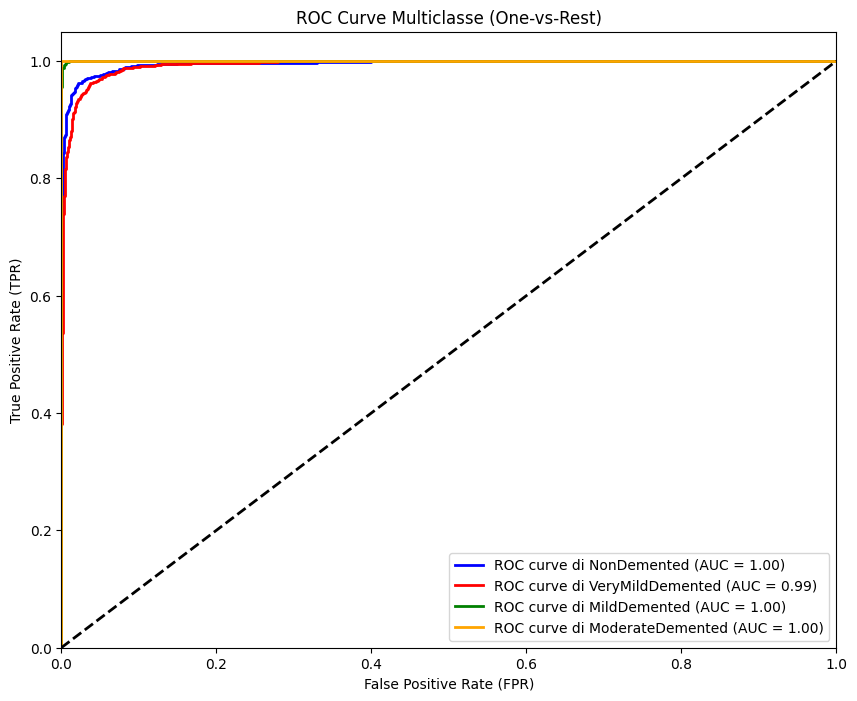


💾 Pesi del modello salvati con successo in: results/multiclass/mobilenet_alzheimer.pth


In [3]:
import torch
import os

# --- IMPORTAZIONI DAI TUOI SCRIPT ---
from src.data.multi_dataloaders import get_dataloaders
from src.data.multi_preprocessing import CLASSES
from src.training.train import train_model
from src.evaluation.metrics import evaluate_model, plot_roc_curve_multiclass
from src.utils.helpers import set_seed
set_seed(42) # Blocca i seed di numpy, random e pytorch

# --- 1. CARICAMENTO DATI ---
print("📦 Creazione dei generatori di dati (DataLoaders)...")
TRAIN_DIR = "data/raw/AugmentedAlzheimerDataset"
ORIGINAL_DIR = "data/raw/OriginalDataset"

# Questa è la riga magica che mancava e che genera i tuoi 3 loader!
train_loader, val_loader, test_loader = get_dataloaders(TRAIN_DIR, ORIGINAL_DIR, batch_size=32)

# --- 2. ADDESTRAMENTO ---
print("\n🚀 Avvio addestramento di MobileNetV2...")
trained_mobilenet = train_model(
    model=mobilenet_model,       # Il modello istanziato nel Blocco 2
    train_loader=train_loader,   # Generato un attimo fa!
    val_loader=val_loader,       # Generato un attimo fa!
    epochs=5,                    # Facciamo 5 epoche per testare
    learning_rate=0.001
)

# --- 3. VALUTAZIONE ---
print("\n📊 Valutazione del modello sul Test Set...")
evaluate_model(trained_mobilenet, test_loader, CLASSES)

# --- 4. CURVA ROC ---
print("\n📈 Generazione della Curva ROC...")
plot_roc_curve_multiclass(trained_mobilenet, test_loader, CLASSES)

# --- 5. SALVATAGGIO ---
os.makedirs("results/multiclass", exist_ok=True)
salvataggio_path = "results/multiclass/mobilenet_alzheimer.pth" # <-- Aggiornato
torch.save(trained_mobilenet.state_dict(), salvataggio_path)
print(f"\n💾 Pesi del modello salvati con successo in: {salvataggio_path}")


🚀 Avvio addestramento di MLP Baseline...
Epoch 1/5
----------
Train Loss: 1.8756 Acc: 0.2755
Val Loss: 1.3080 Acc: 0.4984

Epoch 2/5
----------
Train Loss: 1.3801 Acc: 0.2826
Val Loss: 1.3066 Acc: 0.4984

Epoch 3/5
----------
Train Loss: 1.3774 Acc: 0.2822
Val Loss: 1.3073 Acc: 0.4984

Epoch 4/5
----------
Train Loss: 1.3802 Acc: 0.2824
Val Loss: 1.3047 Acc: 0.4984

Epoch 5/5
----------
Train Loss: 1.3816 Acc: 0.2826
Val Loss: 1.3038 Acc: 0.4984

Migliore Accuratezza in Validazione: 0.498438

📊 Valutazione del modello MLP sul Test Set...

--- Report di Classificazione sul Test Set ---
                  precision    recall  f1-score   support

     NonDemented       0.50      1.00      0.67      1605
VeryMildDemented       0.00      0.00      0.00      1120
    MildDemented       0.00      0.00      0.00       450
ModerateDemented       0.00      0.00      0.00        25

        accuracy                           0.50      3200
       macro avg       0.13      0.25      0.17      3200

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


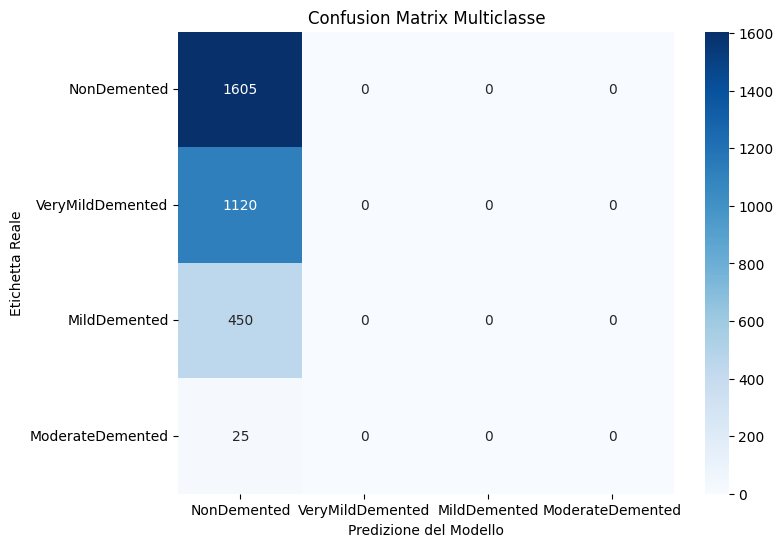


📈 Generazione della Curva ROC per MLP...


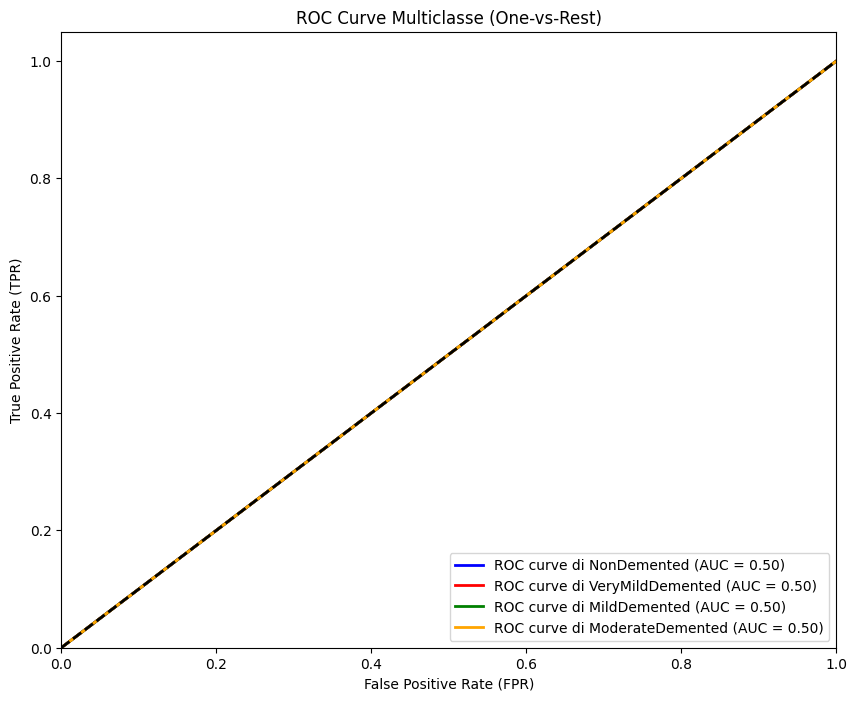


💾 Pesi del modello MLP salvati con successo in: results/multiclass/mlp_alzheimer.pth


In [4]:
# --- 6. ADDESTRAMENTO E VALUTAZIONE MLP (BASELINE) ---
print("\n" + "="*50)
print("🚀 Avvio addestramento di MLP Baseline...")
print("="*50)

trained_mlp = train_model(
    model=mlp_model,             # Il modello MLP istanziato nel Blocco 2
    train_loader=train_loader,
    val_loader=val_loader,
    epochs=5,                    # Manteniamo 5 epoche per un confronto equo
    learning_rate=0.001
)

print("\n📊 Valutazione del modello MLP sul Test Set...")
evaluate_model(trained_mlp, test_loader, CLASSES)

print("\n📈 Generazione della Curva ROC per MLP...")
plot_roc_curve_multiclass(trained_mlp, test_loader, CLASSES)

# Salvataggio
salvataggio_path_mlp = "results/multiclass/mlp_alzheimer.pth" # <-- Aggiornato
torch.save(trained_mlp.state_dict(), salvataggio_path_mlp)
print(f"\n💾 Pesi del modello MLP salvati con successo in: {salvataggio_path_mlp}")


🚀 Avvio addestramento di ResNet-18...
Epoch 1/5
----------
Train Loss: 0.6769 Acc: 0.6946
Val Loss: 1.1317 Acc: 0.5400

Epoch 2/5
----------
Train Loss: 0.4358 Acc: 0.8161
Val Loss: 0.7326 Acc: 0.6875

Epoch 3/5
----------
Train Loss: 0.3006 Acc: 0.8794
Val Loss: 0.3532 Acc: 0.8597

Epoch 4/5
----------
Train Loss: 0.2123 Acc: 0.9183
Val Loss: 0.2485 Acc: 0.9003

Epoch 5/5
----------
Train Loss: 0.1523 Acc: 0.9426
Val Loss: 0.0982 Acc: 0.9644

Migliore Accuratezza in Validazione: 0.964375

📊 Valutazione del modello ResNet-18 sul Test Set...

--- Report di Classificazione sul Test Set ---
                  precision    recall  f1-score   support

     NonDemented       0.94      0.99      0.96      1605
VeryMildDemented       0.99      0.90      0.94      1120
    MildDemented       0.99      0.99      0.99       450
ModerateDemented       1.00      1.00      1.00        25

        accuracy                           0.96      3200
       macro avg       0.98      0.97      0.97      3

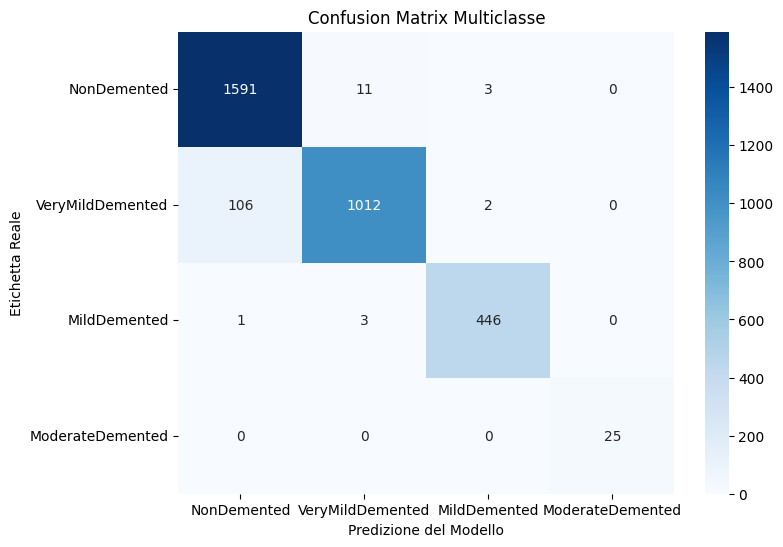


📈 Generazione della Curva ROC per ResNet-18...


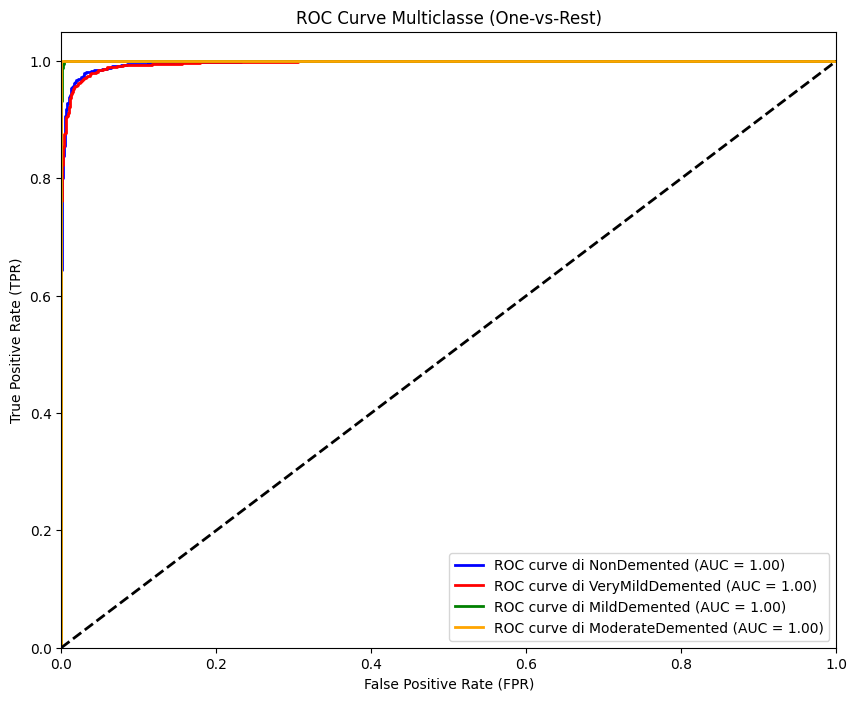


💾 Pesi del modello ResNet salvati con successo in: results/multiclass/resnet_alzheimer.pth


In [5]:
# --- 7. ADDESTRAMENTO E VALUTAZIONE RESNET-18 ---
print("\n" + "="*50)
print("🚀 Avvio addestramento di ResNet-18...")
print("="*50)

trained_resnet = train_model(
    model=resnet_model,          # Il modello ResNet istanziato nel Blocco 2
    train_loader=train_loader,
    val_loader=val_loader,
    epochs=5,
    learning_rate=0.001
)

print("\n📊 Valutazione del modello ResNet-18 sul Test Set...")
evaluate_model(trained_resnet, test_loader, CLASSES)

print("\n📈 Generazione della Curva ROC per ResNet-18...")
plot_roc_curve_multiclass(trained_resnet, test_loader, CLASSES)

# Salvataggio
salvataggio_path_resnet = "results/multiclass/resnet_alzheimer.pth" # <-- Aggiornato
torch.save(trained_resnet.state_dict(), salvataggio_path_resnet)
print(f"\n💾 Pesi del modello ResNet salvati con successo in: {salvataggio_path_resnet}")

## Benchmark dei Modelli Multiclasse

Abbiamo addestrato e valutato 3 diverse architetture sullo stesso Dataset e con gli stessi iperparametri (5 Epoche, LR=0.001).
L'obiettivo era confrontare una rete densa classica (MLP) con reti convoluzionali avanzate (MobileNetV2 e ResNet-18).


In [7]:
import pandas as pd

risultati_benchmark = {
    "Modello": ["MLP (Baseline)", "MobileNetV2", "ResNet-18"],
    "Parametri (Complessità)": ["~77M", "~2.2M", "~11M"],
    "Accuracy Test Set (%)": [
        50.00,  # Accuratezza disastrosa dell'MLP (predice solo la classe maggioritaria)
        96.00,  # Ottimo risultato per la rete leggera
        96.00   # Risultato eccellente (con macro F1 leggermente superiore)
    ],
    "Tempo di Training (stimato)": ["Basso", "Medio", "Alto"]
}

df_benchmark = pd.DataFrame(risultati_benchmark)
df_benchmark.set_index("Modello", inplace=True)

print("--- TABELLA DI BENCHMARK FINALE ---")
display(df_benchmark)

--- TABELLA DI BENCHMARK FINALE ---


,Parametri (Complessità),Accuracy Test Set (%),Tempo di Training (stimato)
Modello,,,
MLP (Baseline),~77M,50.0,Basso
MobileNetV2,~2.2M,96.0,Medio
ResNet-18,~11M,96.0,Alto
